<div class="alert alert-info">

# PSY 4016 / 6973
# Cueillette et traitement des données en neurosciences cognitives
## Chapitre 10: Apprentissage automatique non-supervisé
<p>
<li>Minimisation de variance intra-classe
<li>K-moyens (KMeans)
<li>ACP (PCA)
</div>

<div class="alert alert-info">
<b><h1>Minimisation de variance intra-classe</h1></b></div>

<center><img src="img/biasvariance_graph.png"></center>

<center><img src="img/bias_variance_high_low.JPG"></center> 

<div class="alert alert-success">
<li>la variance signifie "quelle différence" les valeurs peuvent éventuellement être
<br><br>
dans la théorie des probabilités et les statistiques
<li>la variance est l'espérance de l'écart au carré d'une variable aléatoire par rapport à sa moyenne.
<li>la variance mesure la distance entre un ensemble de nombres et leur valeur moyenne
</div>

<center><img src = "img/variance.png"></center>

<div class="alert alert-success">
Exemple d'échantillons de deux populations avec la même moyenne mais des variances différentes. <li>population rouge a une moyenne de 100 et la variance de 100 (DS = 10)
<li>population bleue a une moyenne de 100 et la variance de 2500 (DS = 50).
</div>

<div class="alert alert-success">
<li>La variance intraclasse est la variance au sein d'une même classe; elle décrit la similarité entre les variables de la même classe
<li>la variance interclasse est la variance entre différentes classes
<br><br>
<li>variance faible = les valeurs ont tendance à être très similaires
<li>variance importante = plus probable que les valeurs sont différentes
<br><br>
<b>objectif d'Apprentissage Automatique:</b>
<li>minimiser la variance intra-classe
<li>maximiser la variance interclasse
<li>ou: identifier les grappes dans les données aussi serrées que possible en séparant le plus possible les autres grappes.
<br><br>
<li>la corrélation intraclasse (ou la distance de Mahalanobis) peut être utilisée
<li>pour la comparer à celles des autres classes.
</div>

<div class="alert alert-success">
Voici une image en niveaux de gris très contrastée:
</div>

<center><img src = "img/maison1.jpg"></center>

<div class="alert alert-success">
<li>Laisser binariser l'image: identifier 2 classes (détails de premier plan et d'arrière plan)
<li>Une approche consiste à choisir un seuil au milieu de noir et blanc (à mi-chemin entre 0 et 255) et à découper les pixels avec des valeurs supérieures et inférieures.
</div>

<center><img src = "img/maison2.png"></center>

<div class="alert alert-success">
mais comment savoir quel est le meilleur seuil à utiliser?
<br><br>
algorithmes pour minimiser la variance intra-classe / maximiser la variance interclasse:
<li>ADL (Fisher)
<li>k-moyens
<li>ACP
<li>La méthode d'Otsu
<li>Méthode d'optimisation Jenks (directement liée à la méthode d'Otsu et Fisher ADL)
</div>

<div class="alert alert-info">
<b><h1>K-Moyens / KMeans</h1></b></div>

<div class="alert alert-success">
<li>Les algorithmes de classification non supervisés cherchent à apprendre, à partir des propriétés des données, une division optimale ou un étiquetage discret de groupes de points.

<li>Un algorithme de clustering simple à démarrer est k-moyens.
sklearn.cluster.KMeans</div>

<div class="alert alert-success">
<li>l'algorithme k-moyens cherche un nombre prédéterminé de clusters dans un jeu de données multidimensionnel non étiqueté.
<li>à la base du modèle k-moyens sont deux hypothèses:<ol>
<li>le "centre du cluster" est la moyenne arithmétique de tous les points appartenant au cluster.
<li>chaque point est plus proche de son propre centre de cluster que d’autres centres de cluster.</ol>
</div>

In [1]:
import sklearn

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
print('sklearn version:', sklearn.__version__)

sklearn version: 0.24.1


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

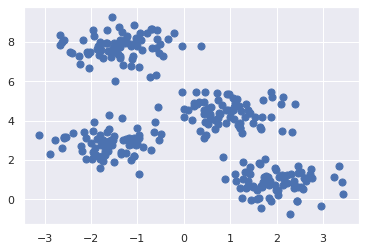

In [15]:
# X, y_true = sklearn.datasets.make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)


from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                    cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

<div class="alert alert-success">
À l’œil, il est relativement facile de choisir les quatre groupes.</div>

In [4]:
# ====> À apprendre <====

from sklearn.cluster import KMeans
# KMeans = algorithm AA  non-supervisé

In [16]:
# ====> À apprendre <====

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

<div class="alert alert-success">
<li>Nous pouvons visualiser les résultats en traçant les données colorées
<li>et les centres de grappes déterminés par l'estimateur k-moyens
</div>

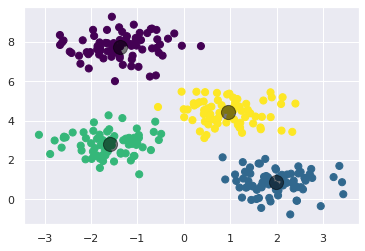

In [17]:
# ====> À apprendre <====


plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

<div class="alert alert-success">
<li>On peut voir que l'algorithme k-moyens (dans ce cas) attribue les points aux clusters de manière très similaire à la manière intuitive.

<li>Pour trouver les grappes aussi rapidement, compte tenu du nombre exponentiel de points de données attribué au nombre de combinaisons d'assignations possibles, l'approche typique de k-moyens implique une approche itérative intuitive appelée <b>attente-maximisation</b> (expectation-maximization)
</div>

<div class="alert alert-success">
<b>Attente-maximisation (A – M)</b> est un algorithme puissant qui comprend les étapes suivantes:<ol>

<li>     Devinez quelques centres de cluster
<li>     Répéter jusqu'à ce que convergé:<ul>
<li>         Étape-A: attribuer des points au centre de cluster le plus proche
    <li>     Étape-M: positionne les centres de la grappe à la moyenne</ul></ol>
<ul>
<li>"Étape-A" = "Étape d'attente": implique de mettre à jour l'attente de la grappe à laquelle chaque point appartient.
<li>"Étape-M" = "Etape de maximisation" - implique de maximiser une fonction de fitness qui définit l'emplacement des centres de grappes. Ceci est accompli en prenant une simple moyenne des données dans chaque cluster.</ul>

<li>En résumé: dans des circonstances typiques, chaque répétition des étapes E et M donnera toujours une meilleure estimation des caractéristiques de la grappe.
</div>

<div class="alert alert-success">
L'algorithme k-moyens est simple et peut être écrit en quelques lignes. Voici une implémentation simple:
</div>

In [7]:
import numpy as np

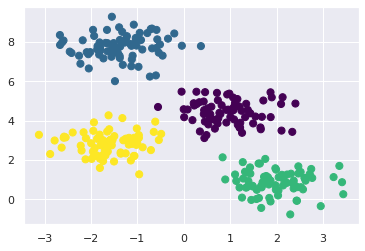

In [18]:
def find_clusters(X, n_clusters, rseed=2):
    # 1. choisir des grappes aléatoires
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Attribuer des étiquettes en fonction du centre le plus proche
        labels = sklearn.metrics.pairwise_distances_argmin(X, centers)
        
        # 2b. Trouver de nouveaux centres à partir des moyens des points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Vérification de la convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

<div class="alert alert-success">
<h3>Inconvénients:</h3><ol>
<li>Le résultat global optimal peut ne pas être atteint.
    <br><br>
(bien que la procédure A – M ait la garantie d’améliorer le résultat à chaque étape, rien ne garantit qu’elle débouchera sur la meilleure solution globale. Par exemple, si nous utilisons une graine aléatoire différente, les suppositions de départ donnent des résultats médiocres)</ol>
</div>

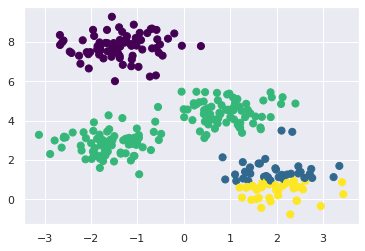

In [19]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

<div class="alert alert-success">
<li>Ici, l'A – M a convergé, mais pas vers une configuration globale optimale.
<li>Il est courant que l'algorithme soit exécuté pour plusieurs hypothèses de départ (sklearn utilise le paramètre n_init par défaut, 10).
</div>

<div class="alert alert-success">
<h3>Inconvénients:</h3><ol start=2>
<li>Le nombre de grappes doit être préalablement sélectionné
<br><br>
(Un autre défi commun aux k-moyens est la nécessité de définir le nombre de grappes attendus: il ne peut pas apprendre le nombre de grappes à partir des données.
Par exemple, si nous demandons à l’algorithme d’identifier six grappes, il trouvera les six meilleures grappes.)</ol>
</div>

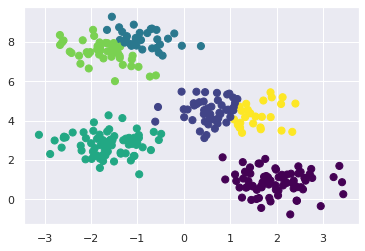

In [20]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

<div class="alert alert-success">
<li>il est plus difficile de décider si le résultat est significatif.
<li>d'autres solutions pour éviter cette limitation consistent à utiliser les algorithmes de classification les plus complexes (modèles de mélange gaussien, DBSCAN, propagation par décalage moyen, propagation par affinité: le sous-module sklearn.cluster).
</div>

<div class="alert alert-success">
<h3>Inconvénients:</h3><ol start=3>
<li>k-moyens est limité aux limites linéaires des grappes
<br><br>
(Les hypothèses fondamentales de modèle de k-moyens (les points seront plus proches de leur propre centre de cluster que d’autres) signifient que l’algorithme sera souvent inefficace si les clusters ont des géométries compliquées. Par exemple les limites entre les groupes k vont toujours être linéaires, ce qui signifie qu’elles échoueront pour des limites plus complexes.)</ol>
</div>

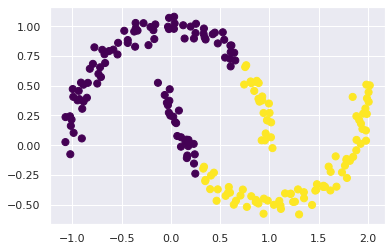

In [21]:
X, y = sklearn.datasets.make_moons(200, noise=.05, random_state=0)


# from sklearn.datasets import make_moons
# X, y = make_moons(200, noise=.05, random_state=0)
etiquettes = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=etiquettes,
            s=50, cmap='viridis');

<div class="alert alert-success">
<li>Cette situation est similaire à la limitation des MVS
<li>Pour y faire face, une transformation du noyau a été utilisée pour projeter les données dans une dimension supérieure où une séparation linéaire est possible
<li>La même méthode peut être utilisée avec k-moyens. Pour permettre de découvrir des limites non linéaires, l'estimateur SpectralClustering peut être utilisé
</div>

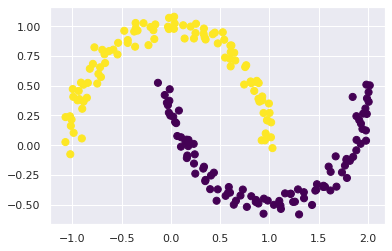

In [22]:
# ====> À apprendre <====

from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
etiquettes = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=etiquettes,
            s=50, cmap='viridis');

<div class="alert alert-success">
Le k-moyennes avec un estimateur est capable de trouver les frontières non linéaires plus complexes entre les grappes.
</div>

<div class="alert alert-success">
<h3>Inconvénients:</h3><ol start=4>
<li>k-moyennes peut être lent pour un grand nombre d'échantillons
<br><br>
(Étant donné que chaque itération de k-moyens doit accéder à chaque point de l'ensemble de données, l'algorithme peut être relativement lent lorsque le nombre d'échantillons augmente.

Pour résoudre ce problème, un algorithme plus souple peut être utilisé pour analyser uniquement un sous-ensemble des données afin de mettre à jour les centres de grappes à chaque étape (sklearn.cluster.MiniBatchKMeans).)</ol>
</div>

<div class="alert alert-success">
<h3>Exemples 1 - k-moyens sur les chiffres:</h3>
<br>
<li>Dans le présent exemple, k-moyens sera utilisé pour identifier les chiffres sans utiliser les étiquettes.
<li>Fondamentalement, k-moyens devra extraire la signification d'un nouvel ensemble de données sur lequel il ne dispose d'aucune information préalable.
<li>La base de données de chiffres comprend:<ul>
    <li>1 797 échantillons
    <li>avec 64 caractéristiques
    <li>correspondant à la luminosité d'un pixel sur une image 8 × 8.</ul>
</div>

In [23]:
digits = sklearn.datasets.load_digits()

# from sklearn.datasets import load_digits
# digits = load_digits()
digits.data.shape

(1797, 64)

<div class="alert alert-success">
Le regroupement peut être effectué comme précédemment:</div>

In [24]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)

kmeans.cluster_centers_.shape

(10, 64)

<div class="alert alert-success">
<li>Le résultat est 10 grappes en 64 dimensions.
<li>Les centres de la grappe sont des points de 64 dimensions et peuvent être interprétés comme le chiffre "typique" de la grappe.
<li>Il est également possible de voir les centres de cluster:
</div>

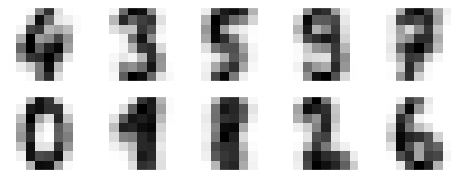

In [21]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

<div class="alert alert-success">
<li>même sans les étiquettes, k-moyens peut trouver des groupes dont les centres sont des chiffres reconnaissables.

<li>comme les étiquettes sont inconnues, k-moyens ne peut pas identifier les grappes et les valeurs 0 et 9 peuvent être permutées.
<li>cela peut être corrigé en faisant correspondre chaque étiquette de cluster apprise avec les étiquettes vraies:
</div>

In [22]:
from scipy.stats import mode
# scipy.stats.mode: Return an array of the modal (most common) value in the passed array.
# If there is more than one such value, only the smallest is returned.

In [23]:
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

<div class="alert alert-success">
<li>Enfin, pour vérifier l’exactitude de la mise en cluster non supervisée dans la recherche de chiffres similaires dans les données:
</div>

In [24]:
# ====> À apprendre <====

sklearn.metrics.accuracy_score(digits.target, labels)

0.7935447968836951

<div class="alert alert-success">
<li>un simple algorithme k-moyens peut détecter le groupement correct pour 80% des chiffres saisis.
</div>

<div class="alert alert-success">
<h3>t-SNE:</h3>
<li>La valeur de précision peut être davantage augmentée lorsque les données initiales sont prétraitées à l'aide d'un algorithme de différence.
<li>Voici un exemple qui utilise l'algorithme d'incorporation de voisins stochastiques à distribution t (t-SNE, t-distributed stochastic neighbor embedding).
<li>Le t-SNE est un algorithme d’incorporation non linéaire particulièrement apte à conserver des points dans des grappes.
<li>Après le prétraitement, les données sont à nouveau analysées à l'aide de l'algorithme k-moyens.
</div>

In [ ]:
# from sklearn.manifold import TSNE
# t-SNE = t-distributed  stochastic neighbor embedding / incorporation de voisins stochastiques à distribution t
# t-SNE est un algorithme d’incorporation non linéaire particulièrement apte à conserver des points dans des grappes

In [26]:
# ====> À apprendre <====

# Projection des données
tsne = sklearn.manifold.TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Calcul des clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permutation des étiquettes
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Calculer la précision
sklearn.metrics.accuracy_score(digits.target, labels)

0.9348914858096828

<div class="alert alert-success">
<li>La précision de la classification a augmenté jusqu'à 92% sans utiliser les étiquettes.
</div>

<div class="alert alert-success">
<h3>Exemples 2 - k-moyens pour la compression des couleurs</h3>
<br>
<li>le clustering peut être utilisé pour la compression des couleurs au sein des images.
<li>dans la plupart des images, un grand nombre de couleurs ne sont pas utilisées et de nombreux pixels de l'image auront des couleurs similaires / identiques (par exemple, dans des images contenant des millions de couleurs).
<li>la base de données sklearn contient des images pouvant être utilisées (<i>nécessite le paquet pillow</i>)</div>

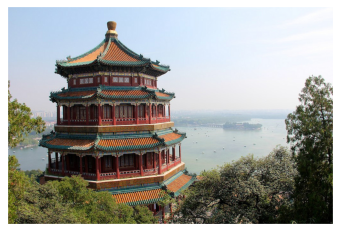

In [27]:
china = sklearn.datasets.load_sample_image("china.jpg")

#from sklearn.datasets import load_sample_image
#china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

<div class="alert alert-success">
<li>L'image est stockée dans un tableau tridimensionnel de taille (hauteur, largeur, RVB)
<li> le tableau contient les contributions rouge / bleu / vert sous forme d'entiers de 0 à 255</div>

In [28]:
china.shape

(427, 640, 3)

<div class="alert alert-success">
<li>Cet ensemble de pixels peut être vu comme un nuage de points dans un espace colorimétrique tridimensionnel.

<li>Pour mieux visualiser les points, ils seront redéfinis sur [n_samples x n_features] et les couleurs seront redimensionnées pour avoir des valeurs comprises entre 0 et 1.</div>

In [29]:
data = china / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

<div class="alert alert-success">
Désormais, les pixels peuvent être visualisés dans l'espace colorimétrique à l'aide d'un sous-ensemble de 10 000 pixels.</div>

In [30]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

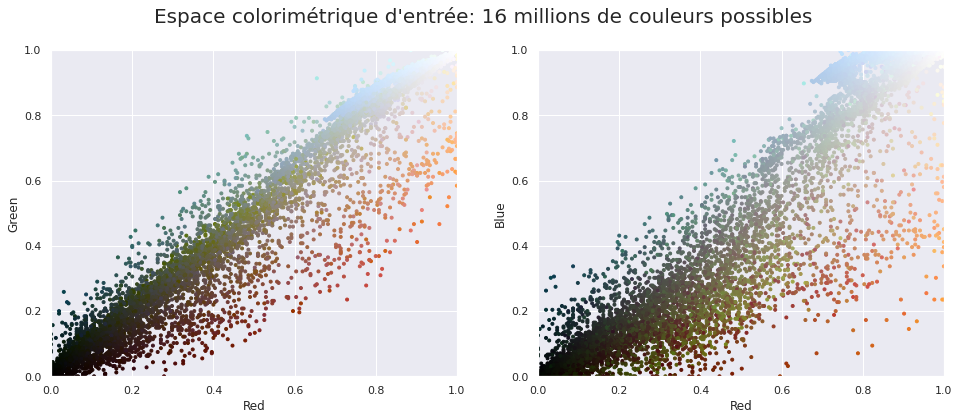

In [31]:
plot_pixels(data, title='Espace colorimétrique d\'entrée: 16 millions de couleurs possibles')

<div class="alert alert-success">
<li>l'algorithme de classification k-moyens peut être utilisé dans tout l'espace des pixels pour réduire les 16 millions de couleurs à 16 couleurs.
<li>Comme le jeu de données est très volumineux, il est plus rapide d'utiliser le mini-lot k-moyens.
<li>Le mini-lot fonctionne sur des sous-ensembles de données et calcule les résultats plus rapidement que l'algorithme k-moyens standard.</div>

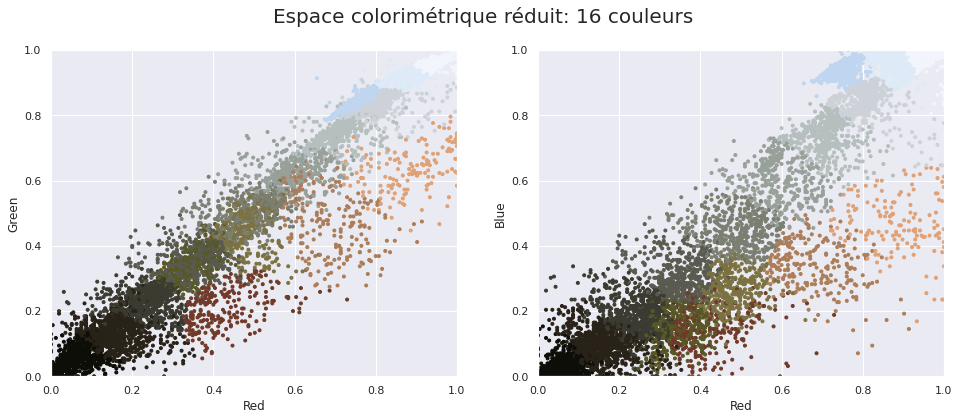

In [32]:
# ====> À apprendre <====

from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Espace colorimétrique réduit: 16 couleurs")

<div class="alert alert-success">
<li>Le résultat est une nouvelle coloration des pixels d'origine, chaque pixel ayant la couleur de son centre le plus proche.
<li>Le résultat final peut être visualisé en traçant les nouvelles couleurs dans l’espace image:</div>

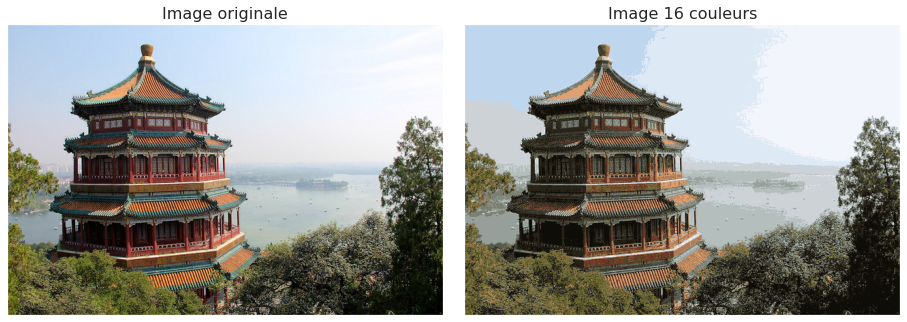

In [33]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Image originale', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('Image 16 couleurs', size=16);

<div class="alert alert-success">
<li>Certains détails sont certainement perdus mais l'image globale est facilement reconnaissable.
<li>La nouvelle image 16 couleurs a un facteur de compression d'environ 1 million.</div>

<div class="alert alert-info">
<b><h1>ACP, Analyse en composantes principales</h1></b>
<h4>(PCA, principal component analysis; KLT, tranformation de Karhunen-Loève)</h4></div>

<div class="alert alert-success">
<li>L’un des algorithmes non supervisés («ignore» les étiquettes de classe) les plus largement utilisés est l’analyse en composantes principales (ACP).
<li>l'objectif fondamentale de l'ACP est de réduction de la dimensionnalité:
    <ul>
    <li> trouver les directions (les composantes dites principales) qui maximisent la variance dans un jeu de données</ul>
<li>mais ACP peut être utile pour:<ul>
    <li>visualisation
    <li>filtrage du bruit
    <li>extraction de caractéristiques
    <li>ingénierie
    <li>etc.</ul></div>

<div class="alert alert-success">
<li>L'analyse en composantes principales est rapide et peut être plus facilement comprise en consultant un jeu de données bidimensionnel.</div>

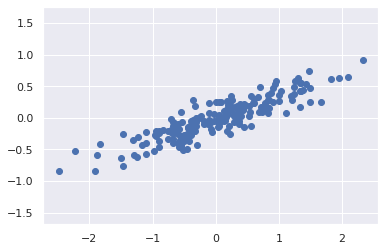

In [34]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

<div class="alert alert-success">
<li>Le présent exemple présente une relation presque linéaire entre les variables x et y.
<li>Le but de l'ACP est différent. Il ne se concentrera pas sur la prédiction de la valeur y à partir de la valeur x.
<li>ACP va essayer d'apprendre la relation entre les valeurs x et y.

<li>Pour mesurer cette relation, le PVA va:<ol>
<li>- trouver une liste des principaux axes dans les données
<li>- et utilisera ces axes pour décrire le jeu de données.</ol>
</div>

In [ ]:
# from sklearn.decomposition import PCA
# PCA = Principal Component Analysis (autre nom: KLT = tranformation de Karhunen-Loève)
# PCA = algorithm AA non-supervisé

In [35]:
# ====> À apprendre <====

pca = sklearn.decomposition.PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

<div class="alert alert-success">
Le fit apprend certaines quantités des données:<br><br>
<li>les "composants"
<li>et "variance expliquée":
</div>

In [36]:
# ====> À apprendre <====

print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [37]:
# ====> À apprendre <====

print(pca.explained_variance_)

[0.7625315 0.0184779]


<div class="alert alert-success">
<li>Pour voir ce que signifient ces nombres, ils peuvent être visualisés sous forme de vecteurs sur les données d'entrée.
<li>les "composants" - définissent la direction du vecteur
<li>la "variance expliquée" - définit la longueur au carré du vecteur
</div>

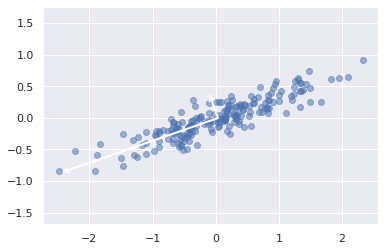

In [57]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

<div class="alert alert-success">
<li>Les vecteurs représentent les principaux axes des données.
<li>La longueur du vecteur indique l’importance de cet axe dans la description de la distribution des données.
<li>Cette importance est une mesure de la variance des données lorsqu'elles sont projetées sur cet axe.
<li>La projection de chaque point de données sur les axes principaux sont les "composantes principales" des données.
<li>Les principales composantes sont également visibles sur les données d'origine:
</div>

[Text(0.5, 0, 'component 1'),
 Text(0, 0.5, 'component 2'),
 Text(0.5, 1.0, 'principal components'),
 (-5.0, 5.0),
 (-3.0, 3.1)]

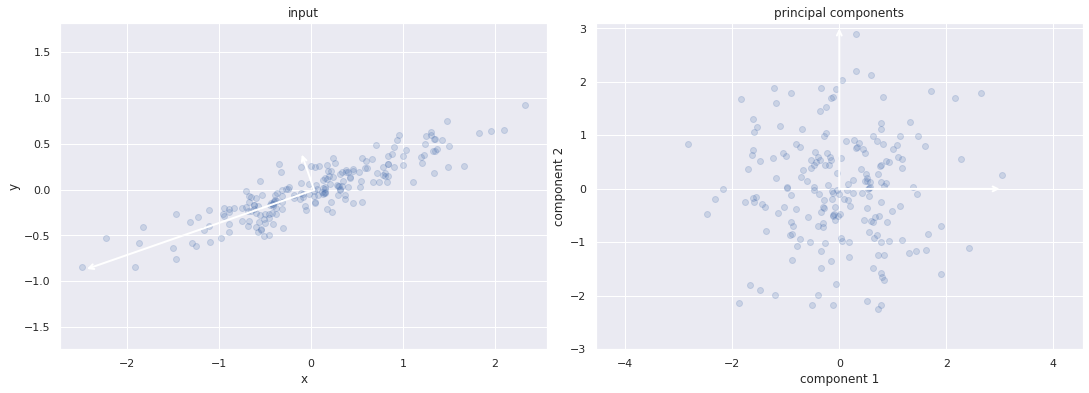

In [58]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
pca = sklearn.decomposition.PCA(n_components=2, whiten=True)
pca.fit(X)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))

<div class="alert alert-success">
<li>La transformation des axes de données en axes principaux est une transformation affine.
<li>Il est composé d'une translation, d'une rotation et d'une mise à l'échelle uniforme.
<li>Mais l'algorithme ACP a plus d'applications pour l'exploration de données.
</div>

<div class="alert alert-success">
<h3>ACP - réduction de dimensionnalité</h3>
<br>
<li>la réduction de la dimensionnalité consiste à demander s’il existe une représentation correspondante de la dimension inférieure conservant les principales caractéristiques des données
<li>la réduction de dimensionnalité avec ACP implique la mise à zéro d'un ou de plusieurs des composants principaux les plus petits.
<li>le résultat est une projection dimensionnelle inférieure des données, mais conserve la variance maximale des données.
<li>voici un exemple:</div>

In [33]:
# ====> À apprendre <====

pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


<div class="alert alert-success">
<li>les données transformées ont été réduites à une seule dimension.
<li>pour comprendre l'effet de la réduction de dimensionnalité, une transformation inverse des données réduites peut être effectuée.
<li>il peut être tracé avec les données d'origine:
</div>

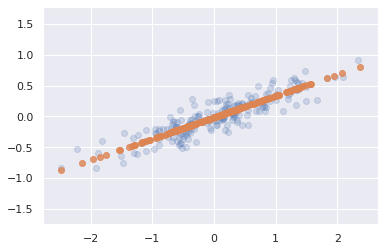

In [34]:
# ====> À apprendre <====

X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

<div class="alert alert-success">
<li>Les points lumineux sont les données d'origine.
<li>les points sombres sont la version projetée.
<li>la réduction de la dimensionnalité signifie que les informations le long du ou des axes principaux les moins importants sont supprimées.
<li>cela ne laisse que le ou les composants des données présentant la variance la plus élevée.
<li>la fraction de la variance qui est découpée (proportionnelle à la dispersion des points autour de la ligne formée dans cette figure) est une mesure approximative de la quantité "d'information" ignorée dans cette réduction de dimensionnalité.
<li>cet ensemble de données aux dimensions réduites est "assez bon" pour coder les relations les plus importantes entre les points.
<li>malgré une réduction de 50% de la dimension des données, la relation globale entre les points de données est en grande partie conservée.</div>

<div class="alert alert-success">
<li>exemple sur la base de données iris
    <br><br>
<li>Les données de l'iris ont quatre dimensions (quatre caractéristiques pour chaque échantillon)
<li>La réduction de la dimensionnalité est souvent utilisée comme une aide à la visualisation des données (il est plus facile de tracer des données en deux dimensions qu'en quatre dimensions).
<li>L’analyse en composantes principales (ACP) / Principal component analysis (PCA) est un bon modèle pour cela
<li>ACP fournit une technique rapide de réduction de dimensionnalité linéaire
<li>Nous demanderons au modèle de renvoyer deux composants (représentation bidimensionnelle des données)
</div>

In [1]:
# ====> À apprendre <====

import seaborn as sns
sns.set()
iris = sns.load_dataset('iris')

X_iris = iris.drop('species', axis=1)
y_iris = iris['species']


# étape 1
from sklearn.decomposition import PCA

# étape 2
model = PCA(n_components=2)

# étape 4
model.fit(X_iris)

# étape 5
X_2D = model.transform(X_iris)

iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

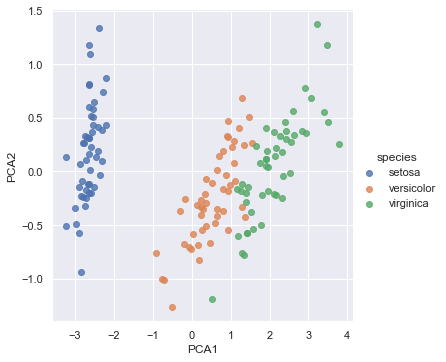

In [6]:
sns.lmplot(x = "PCA1", y = "PCA2", hue='species', data=iris, fit_reg=False);

<div class="alert alert-success">
<li>le graphique montre qu'une représentation 2D a une bonne séparation pour les espèces
<li>c'est une indication qu'une classification sera probablement efficace
</div>

<div class="alert alert-success">
<li>Faisons une classification avec une méthode puissante - le modèle de mélange gaussien (Gaussian mixture model , GMM)
<li>GMM tente de modéliser les données sous forme de collection de blobs gaussiens
</div>

In [3]:
# ====> À apprendre <====

# étape 1
#from sklearn.mixture import GMM
from sklearn.mixture import GaussianMixture as GMM

# étape 2
model = GMM(n_components=3,
            covariance_type='full')

# étape 4; Remarquez que y n'est pas spécifié!
model.fit(X_iris)

# étape 5
y_gmm = model.predict(X_iris)

iris['cluster'] = y_gmm

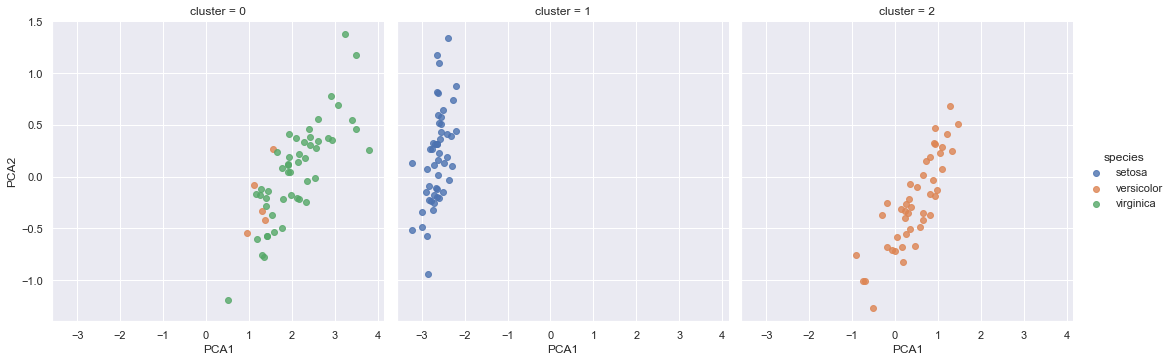

In [5]:
sns.lmplot(x = "PCA1", y = "PCA2", data=iris, hue='species',col='cluster', fit_reg=False);

<div class="alert alert-success">
<h3>ACP - visualisation</h3>
<li>Lorsque nous avons plus de dimensions, l'utilité de la réduction de la dimensionnalité peut être mieux comprise.
<li>Le jeu de données digits est un bon exemple.</div>

In [35]:
#digits = load_digits()
digits.data.shape

(1797, 64)

<div class="alert alert-success">
<li>Les données numériques sont composées d'images 8 × 8 pixels, elles ont donc 64 dimensions.
<li>Pour voir les relations entre les points, une dimension inférieure pourrait apporter une meilleure compréhension.</div>

In [36]:
# ====> À apprendre <====

pca = PCA(2)  # projection de 64 à 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


<div class="alert alert-success">
<li>Sur un tracé, on peut voir les deux premières composantes principales de chaque point</div>

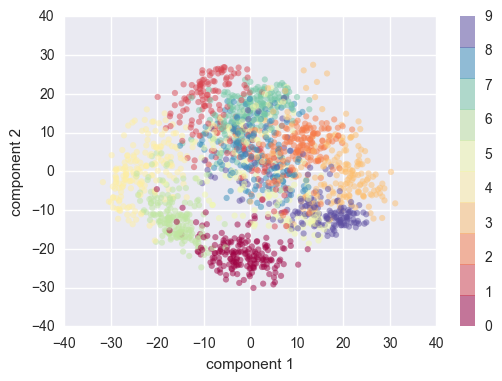

In [17]:
# ====> À apprendre <====

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

<div class="alert alert-success">
décoder le sens:<br><br>
<li>les données complètes sont un nuage de points de 64 dimensions
<li>tous ces points sont la projection de chaque point de données dans les directions avec la plus grande variance.
<li>le graphique montre l'étirement et la rotation optimaux dans un espace à 64 dimensions de la disposition des chiffres en deux dimensions.</div>

<div class="alert alert-success">
<li>les dimensions réduites peuvent être comprises en termes de combinaisons de vecteurs de base.
<li>Dans le jeu de données initial, chaque image est un ensemble de 64 valeurs. Le vecteur a donc 64 valeurs.<ul>
<li> vector = [valeur 1, valeur 2, valeur 3, ... valeur 64]</ul>
<li>pour construire l'image, chaque élément du vecteur correspond à un pixel (point sur l'image) et à tous les résultats permettant de construire l'image.
<li>si seulement 8 pixels (points) sont utilisés, ils peuvent indiquer une tendance générale de l'image dans une projection à 8 dimensions, mais cette image peut ne pas refléter toute l'image.</div>

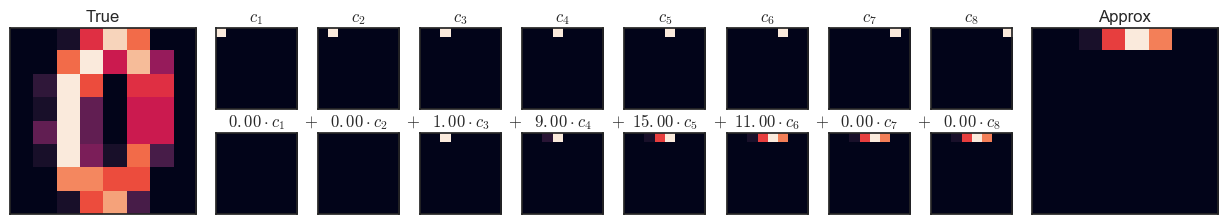

In [18]:
def plot_pca_components(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean
        

    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)

    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest')
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")
    
    approx = mean.copy()
    
    counter = 2
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1

    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + counter, approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        if show_mean or i > 0:
            plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                           transform=plt.gca().transAxes, fontsize=fontsize)

    show(slice(2), slice(-2, None), approx, "Approx")
    return fig


#digits = load_digits()
sns.set_style('white')

fig = plot_pca_components(digits.data[10],
                          show_mean=False)

<div class="alert alert-success">
<li>les panneaux supérieurs montrent les pixels individuels
<li>les panneaux inférieurs montrent la contribution cumulée des pixels
</div>

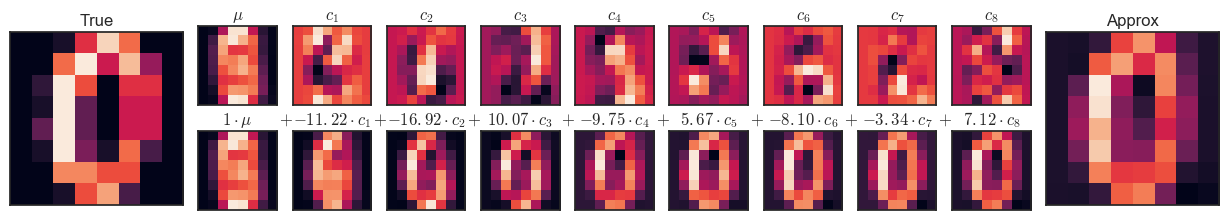

In [19]:
pca = PCA(n_components=8)
Xproj = pca.fit_transform(digits.data)
sns.set_style('white')
fig = plot_pca_components(digits.data[10], Xproj[10],
                          pca.mean_, pca.components_)

<div class="alert alert-success">
<li>En utilisant ACP, il est possible de déterminer les principales caractéristiques des données avec seulement plusieurs composants.
<li>La dimension inférieure fournie par ACP peut être considérée comme un ensemble de fonctions de base plus efficaces que les données d'entrée natives.</div>

<div class="alert alert-success">
<li>L’un des défis posés par les pays ACP est la nécessité d’estimer le nombre de composants à extraire.
<li>Pour répondre à cette question, le ratio de variance expliquée cumulative peut être utilisé en fonction du nombre de composants.</div>

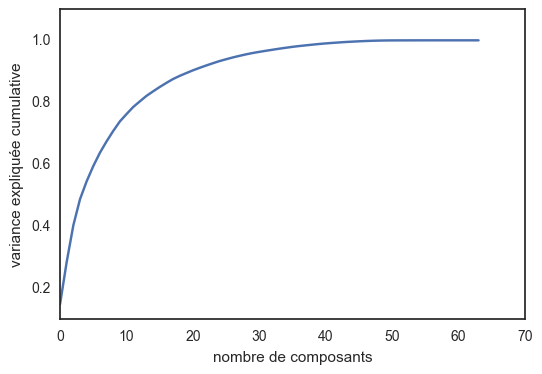

In [20]:
# ====> À apprendre <====

pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('nombre de composants')
plt.ylabel('variance expliquée cumulative');

<div class="alert alert-success">
Cette courbe présente plusieurs conclusions:<br><ul>
<li>les 10 premiers composants contiennent environ 75% de la variance
<li>environ 50 composants décrivent presque 100% de la variance.
<li>la projection 2D perd beaucoup d’informations et il faut au moins 20 composantes pour conserver 90% de la variance.
<li>le graphique peut également indiquer le niveau de redondance dans plusieurs observations</ul>.</div>

<div class="alert alert-success">
<h3>ACP - Filtrage du bruit</h3>
<br>
HYPOTHÈSE:<br>
<b><li>il y a toujours du bruit dans les données
<li>le bruit a un niveau de variance
<li>les données ont une variance
<li>le bruit influence les données
<li>les composants dont la variance est supérieure à la variance du bruit ont la plus faible probabilité d'être influencés par le bruit.</b>
<br><br>
Sur cette base
<li>ACP extrait les principaux composants du plus grand sous-ensemble. Ces composants ont:
<li>la probabilité la plus GRANDE de représenter la VALEUR
<li>la probabilité la plus FAIBLE de représenter le BRUIT</div>

<div class="alert alert-success">
Exemple: voici les données sans bruit</div>

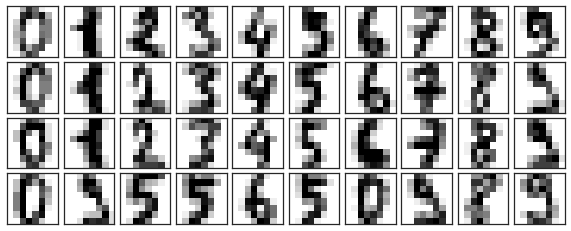

In [41]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

<div class="alert alert-success">
voici les données avec bruit aléatoire
</div>

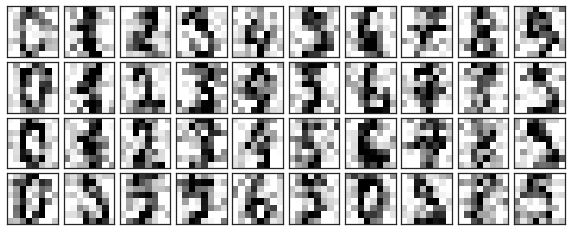

In [42]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

<div class="alert alert-success">
<li>ACP peut être utilisé pour voir les principales composantes / la tendance principale et pour éliminer le bruit.
<li>Initialement, il est nécessaire de voir le nombre de composants requis pour préserver 50% de la variance.</div>

In [43]:
# ====> À apprendre <====

pca = PCA(0.50).fit(noisy)
pca.n_components_

12

<div class="alert alert-success">
<li>12 composants représentent 50% de la variance.
<li>prochaine étape - les composants sont calculés pour l'ensemble des données
<li>enfin, la transformation inverse est utilisée pour reconstruire les valeurs filtrées:</div>

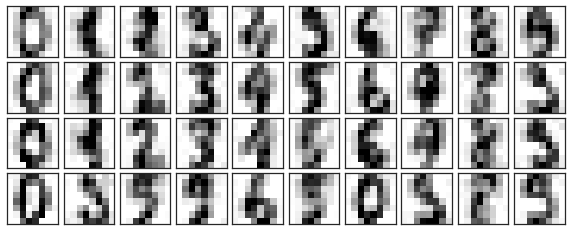

In [44]:
# ====> À apprendre <====

components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

<div class="alert alert-success">
<li>cette méthode permet d'utiliser les nouvelles données pour la formation et la classification et ces données ont un niveau de bruit faible.
<li>alors que les données initiales sont déjà biaisées avec le bruit et qu’elles ont une probabilité plus grande d’insérer du bruit dans les résultats.</div>

<div class="alert alert-success">
<h3>ACP - sélection des caractéristiques et variance des données</h3>
<br>
<li>L'exemple sera montré sur le jeu de données faces.
<li>Le jeu de données de faces est très volumineux avec près de 3000 dimensions et il est préférable d'utiliser le module PCA.
<li>PCA: contient une méthode aléatoire pour approcher les premiers composants principaux de NN beaucoup plus rapidement que la CPA standard.
<li>Les 150 premiers composants seront analysés.</div>

In [46]:
# Version 1
faces = sklearn.datasets.fetch_lfw_people(min_faces_per_person=60)

# Version 2
# from sklearn.datasets import fetch_lfw_people
# faces = fetch_lfw_people(min_faces_per_person=60)

print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [48]:
# ====> À apprendre <====

pca = PCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

<div class="alert alert-success">
Il est maintenant possible de voir les images associées aux 150 premiers composants principaux.</div>

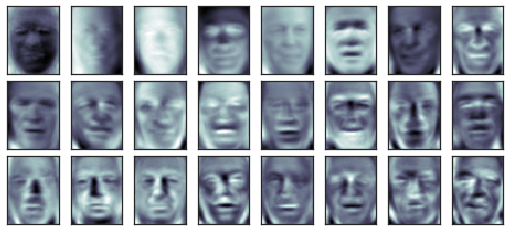

In [49]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

<div class="alert alert-success">
la variance cumulative de ces composants indique la quantité d'informations de données conservées dans la nouvelle projection de dimension</div>

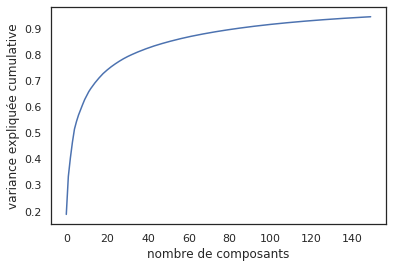

In [50]:
# ====> À apprendre <====

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('nombre de composants')
plt.ylabel('variance expliquée cumulative');

<div class="alert alert-success">
<li>150 composants représentent environ 90% de la variance.
<li>Probablemant 150 composants récupéreraient la plupart des caractéristiques essentielles des données
<li>Ceci peut être vérifié par une comparaison entre les images d'entrée et la reconstruction à partir des 150 composants:</div>

In [52]:
# ====> À apprendre <====

# Calcul des composants et des faces projetées
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

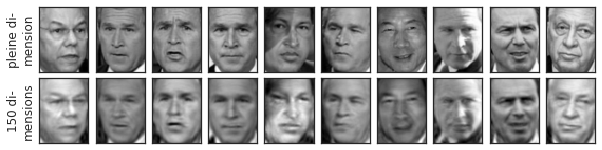

In [53]:
# Tracer les résultats
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('pleine di-\nmension')
ax[1, 0].set_ylabel('150 di-\nmensions');

<div class="alert alert-success">
<li>ACP a reconstruit les images presque clairement en utilisant seulement 150 fonctions.
<li>ces fonctionnalités peuvent en outre être utilisées pour l'algorithme de classification et peuvent conduire à une classification beaucoup plus efficace.</div>

<div class="alert alert-success">
<h3>ACP - Résumé</h3>
<br>ACP est un bon début avant de classer les données comme suit:<ul>
<li>visualiser la relation entre les points.
<li>comprendre la principale variance dans les données
<li>comprendre la dimensionnalité intrinsèque (rapport de variance).</ul>
<br>
<li>Principale faiblesse de ACP - il est affecté par des valeurs aberrantes. Pour faire face à cette faiblesse, d’autres versions de ACP peuvent être utilisées:<ul>
<li>RandomizedPCA utilise une méthode non déterministe et se rapproche des quelques premières composantes principales.
<li>SparsePCA - applique la clarté des composants.</ul></div>